In [1]:
import fiona
import geopandas as gpd
import os
import pandas as pd

In [2]:
# List available layers in the geopackage file
layers = fiona.listlayers('../app/data/INSPIRE_AU.gpkg')
print("Available layers:", layers)

Available layers: ['AdministrativeBoundary', 'AdministrativeUnit']


In [3]:
admin_units = gpd.read_file('../app/data/INSPIRE_AU.gpkg', layer='AdministrativeBoundary')

In [4]:
admin_units_metadata = gpd.read_file('../app/data/INSPIRE_AU.gpkg', layer='AdministrativeUnit')

In [5]:
admin_units_metadata.columns

Index(['id', 'localId', 'namespace', 'versionId', 'beginLifeSpanVersion',
       'endLifeSpanVersion', 'country', 'name', 'nationalCode',
       'nationalLevel', 'nationalLevelName', 'residenceOfAuthority',
       'condominium', 'lowerLevelUnit', 'upperLevelUnit', 'administeredBy',
       'coAdminister', 'geometry'],
      dtype='object')

In [6]:
admin_units_metadata[['nationalLevelName', 'administeredBy', 'name']].nationalLevelName.unique()

array(['okres', 'obec', 'štát', 'kraj'], dtype=object)

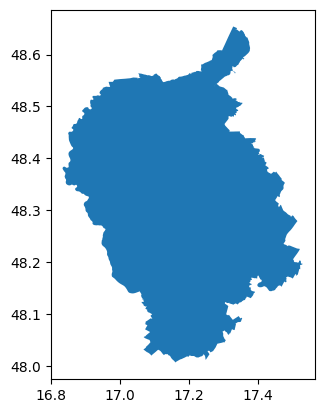

In [7]:
ba_admin_unit = admin_units_metadata[(admin_units_metadata.nationalLevelName == 'kraj') & (admin_units_metadata.name == 'Bratislavský')].plot()

In [8]:
# List available layers in the geopackage file
layers = fiona.listlayers('../app/data/BratislavskyC/991953.gml')
print("Available layers:", layers)

Available layers: ['CadastralZoning']


In [14]:
ls = []
for f in os.listdir('../app/data/BratislavskyC/'):
    if f.endswith('.gml'):
        path = os.path.join('../app/data/BratislavskyC/', f)
        layers = fiona.listlayers(path)
        if 'CadastralParcel' in layers:
            ls.append(gpd.read_file(path, layer='CadastralParcel')[['gml_id', 'geometry']])

In [16]:
parcels_c = pd.concat(ls)

In [18]:
parcels_c.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 746221 entries, 0 to 12020
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype   
---  ------    --------------   -----   
 0   gml_id    746221 non-null  object  
 1   geometry  746221 non-null  geometry
dtypes: geometry(1), object(1)
memory usage: 17.1+ MB


In [19]:
parcels_c.to_file('../app/data/processed/parcels_c.geojson', driver='GeoJSON')

In [20]:
ls = []
for f in os.listdir('../app/data/BratislavskyE/'):
    if f.endswith('.gml'):
        path = os.path.join('../app/data/BratislavskyE/', f)
        layers = fiona.listlayers(path)
        if 'CadastralParcel' in layers:
            ls.append(gpd.read_file(path, layer='CadastralParcel')[['gml_id', 'geometry']])

In [21]:
parcels_e = pd.concat(ls)

In [22]:
parcels_e.to_file('../app/data/processed/parcels_e.geojson', driver='GeoJSON')